## Champions League Data Analytics (2010-2022)
- Data cleansing
- Descriptive Analytics
- Forecasting

## Import Dataset and Libraries

In [176]:
import pandas as pd
import numpy as np

df_attacking = pd.read_csv('/Users/sandeepk/Desktop/DS_Workshop/Summer_Proj/UCL Datasets Folder/attacking.csv')
df_attampts = pd.read_csv('/Users/sandeepk/Desktop/DS_Workshop/Summer_Proj/UCL Datasets Folder/attempts.csv')
df_defending = pd.read_csv('/Users/sandeepk/Desktop/DS_Workshop/Summer_Proj/UCL Datasets Folder/defending.csv')
df_disciplinary = pd.read_csv('/Users/sandeepk/Desktop/DS_Workshop/Summer_Proj/UCL Datasets Folder/disciplinary.csv')
df_distributon = pd.read_csv('/Users/sandeepk/Desktop/DS_Workshop/Summer_Proj/UCL Datasets Folder/distributon.csv')
df_goalkeeping = pd.read_csv('/Users/sandeepk/Desktop/DS_Workshop/Summer_Proj/UCL Datasets Folder/goalkeeping.csv')
df_goals = pd.read_csv('/Users/sandeepk/Desktop/DS_Workshop/Summer_Proj/UCL Datasets Folder/goals.csv')
df_key_stats = pd.read_csv('/Users/sandeepk/Desktop/DS_Workshop/Summer_Proj/UCL Datasets Folder/key_stats.csv')

In [177]:
#Recieve na reporting
ls = list(df_attacking.columns)
for x in ls:
  if sum(df_attacking[x].isna()) > 0:
    print(x)
    print(sum(df_attacking[x].isna()))
    print()

## User Input Based Aggregation
- GUI + UX
    - Display selected player & team total assists/dribbles 
    - Position average Comparison to selected player

In [254]:
choice = input('Which player Assists would you like to view? ')

ret = df_attacking[df_attacking['player_name'].str.contains(choice)]
ret1 = ret.loc[:,['player_name', 'position', 'match_played', 'assists']]
index = ret1['position'].iloc[0]

sub = df_attacking.groupby('position').agg({'assists':'mean'}).round(2)
ans = sub.loc[index]

ret1['Position_Avg'] = ans[0]
ret1


Which player Assists would you like to view? Bruno Fernandes


,player_name,position,match_played,assists,Position_Avg
0,Bruno Fernandes,Midfielder,7,7,1.67


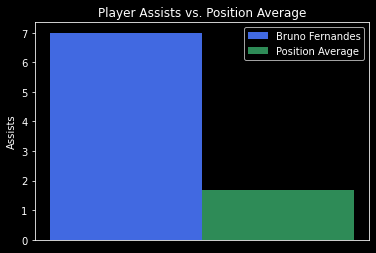

In [255]:
import matplotlib.pyplot as plt
N = 1
assi = list(ret1.iloc[:,3])
po_avg = list(ret1.iloc[:,4])

name = list(ret1.iloc[:,0
])

player_avg = (assi[0])


ind = np.arange(N)  
width = 0.25      

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, player_avg, width, color='royalblue')


pos_avg = (po_avg[0])

rects2 = ax.bar(ind+width, pos_avg, width, color='seagreen')

# add some
ax.set_ylabel('Assists')
ax.set_title('Player Assists vs. Position Average')

ax.set_xticks(ind + width / 0.01)
ax.set_xticklabels

ax.legend( (rects1[0], rects2[0]), (name[0], 'Position Average') )

plt.show()

```GUI```

In [178]:
import tkinter
import tkinter.messagebox

class PlayerSearchGUI:
    def __init__(self):
        self.main_window = tkinter.Tk()
        self.top_frame = tkinter.Frame(self.main_window)
        self.bottom_frame = tkinter.Frame(self.main_window)
        
        self.prompt_label = tkinter.Label(self.top_frame,
                                         text='Enter a player name')
        self.player_entry = tkinter.Entry(self.top_frame,
                                         width=10)
        
        self.prompt_label.pack(side='left')
        self.player_entry.pack(side='left')
        
        self.assist_button = tkinter.Button(self.bottom_frame,
                                            text = 'Assists',
                                            command = self.assists)
        self.dribble_button = tkinter.Button(self.bottom_frame,
                                            text = 'Dribbles',
                                            command = self.drb)
        self.quit_button = tkinter.Button(self.bottom_frame,
                                         text = 'Quit',
                                         command = self.main_window.destroy)
        
        self.assist_button.pack(side='left')
        self.dribble_button.pack(side='left')
        self.quit_button.pack(side='left')
        
        self.top_frame.pack()
        self.bottom_frame.pack()
        
        tkinter.mainloop()
        
    def assists(self):
        choice = self.player_entry.get()
        ret = df_attacking[df_attacking['player_name'].str.contains(choice)]
        ret1 = ret.loc[:,['player_name', 'position', 'match_played', 'assists']]
        index = ret1['position'].iloc[0]

        sub = df_attacking.groupby('position').agg({'assists':'mean'}).round(2)
        z = list(ret1.loc[:, 'assists'])
        tkinter.messagebox.showinfo('Assists:', z[0])
        
    def drb(self):
        choice1 = self.player_entry.get()
        ret2 = df_attacking[df_attacking['player_name'].str.contains(choice)]
        ret3 = ret.loc[:,['player_name', 'dribbles']]
        y = list(ret1.loc[:, 'dribbles'])
        tkinter.messagebox.showinfo('Dribbles:',y[0])
        
        #Can Expand to Goals, Defense, etc.
player_search = PlayerSearchGUI()
        

In [179]:
club_ls = list(df_attacking['club'].unique())
i = 1
for x in club_ls:
    print(f'{i}) {x}')
    i+=1
choice = int(input("Which team assists would you like to view? "))
z = club_ls[choice-1]
df_club_sum = df_attacking.groupby('club').agg({'assists': 'sum'})
df_club_sum[df_club_sum.index == z]

1) Man. United
2) Real Madrid
3) Bayern
4) Ajax
5) Liverpool
6) Man. City
7) Benfica
8) Paris
9) Villarreal
10) Wolfsburg
11) Leipzig
12) Dortmund
13) Atalanta
14) Sheriff
15) Chelsea
16) Beşiktaş
17) Juventus
18) Sporting CP
19) Zenit
20) Salzburg
21) Atlético
22) LOSC
23) Inter
24) Club Brugge
25) Young Boys
26) Dynamo Kyiv
27) Sevilla
28) Shakhtar Donetsk
29) Milan
30) Porto
31) Barcelona
32) Malmö
Which team assists would you like to view? 2


,assists
club,
Real Madrid,21


In [137]:
df_attacking

,serial,player_name,club,position,assists,corner_taken,offsides,dribbles,match_played
0,1,Bruno Fernandes,Man. United,Midfielder,7,10,2,7,7
1,2,Vinícius Júnior,Real Madrid,Forward,6,3,4,83,13
2,2,Sané,Bayern,Midfielder,6,3,3,32,10
3,4,Antony,Ajax,Forward,5,3,4,28,7
4,5,Alexander-Arnold,Liverpool,Defender,4,36,0,9,9
...,...,...,...,...,...,...,...,...,...
171,64,Tolisso,Bayern,Midfielder,1,0,0,0,4
172,64,Schuurs,Ajax,Defender,1,0,0,0,3
173,64,Kryvtsov,Shakhtar Donetsk,Defender,1,0,0,0,3
174,64,Stanišić,Bayern,Defender,1,0,0,0,2


# Top 5 Assists and Scorers in CL

In [136]:
df_top_assists = df_attacking.groupby('player_name').agg({'assists':'sum'})
df_top_assists.sort_values(by=['assists'], ascending=False, inplace=True)
df_top_assists.head(5)
#df_attacking

,assists
player_name,
Bruno Fernandes,7
Vinícius Júnior,6
Sané,6
Antony,5
Alexander-Arnold,4
